   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
(200, 5)


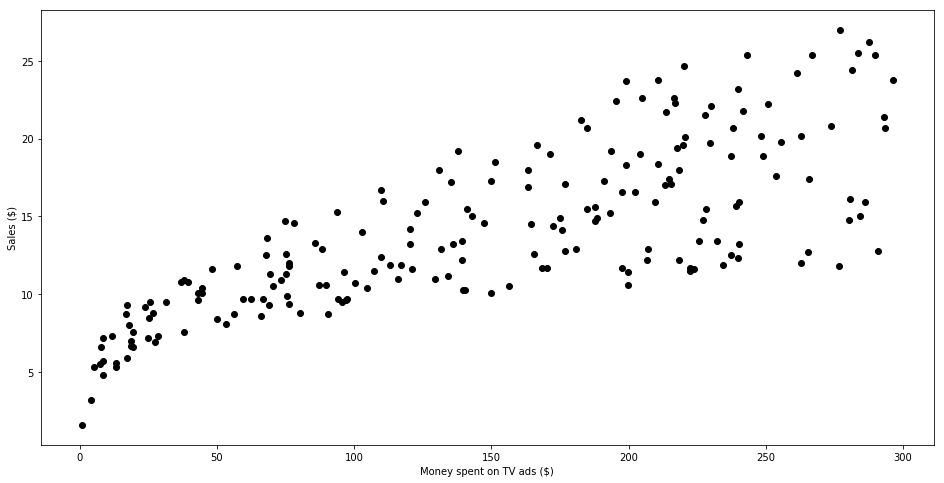

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000
<bound method NDFrame.head of         TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
6     57.5
7    120.2
8      8.6
9    199.8
10    66.1
11   214.7
12    23.8
13    97.5
14   204.1
15   195.4
16    67.8
17   281.4
18    69.2
19   147.3
20   218.4
21   237.4
22    13.2
23   228.3
24    62.3
25   262.9
26   142.9
27   240.1
28   248.8
29    70.6
..     ...
170   50.0
171  164.5
172   19.6
173  168.4
174  222.4
175  276.9
176  248.4
177  170.2
178  276.7
179  165.6
180  156.6
181  218.5
182   56.2
183  287.6
184  253.8
185  205.0
186  139.5
187  191.1
188  286.0
189   18.7
190   39.5
191

C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\vamsi\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Linear Regression')

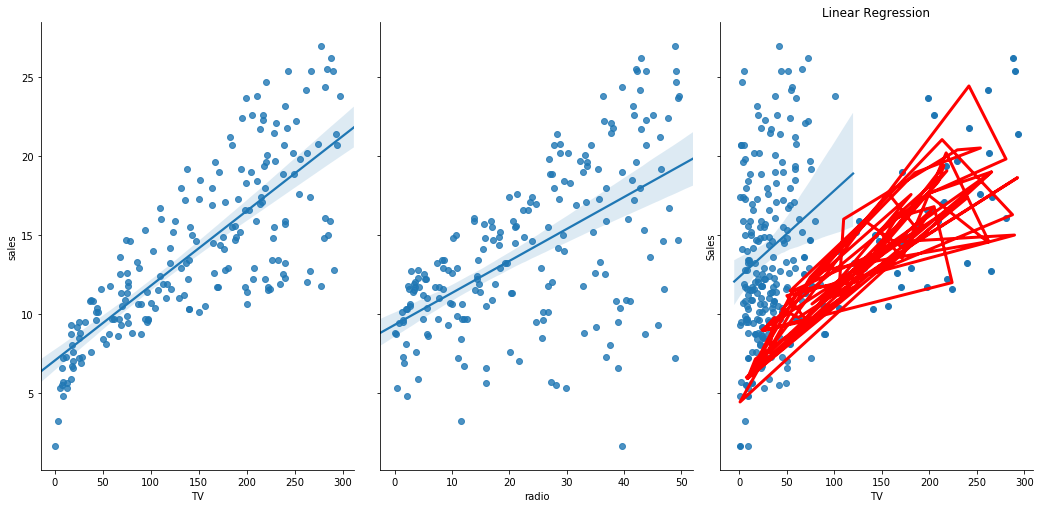

In [4]:
import pandas as pd #reading dataset into data frame
import numpy as np #to create objects and apply statistical functions
import seaborn as sns #plotting mechanism
#crossvalidation is to divide the dataset into subsets and see the model accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #plotting mechanism
from sklearn import metrics #metrics like sso, ssto, mse, rse rmse 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #we have coeff of recursion r and coefficient of determination rsquare
import statsmodels.api as sm #its a latest library used for training the model and start predicting using the model similar to sk.traintest split and sk.linear regression

#bagging,boosting comes under ensemble. ensembling is nothing but gathering more and more data 
#to get accuracy i.e the more data we have the more accuracy we get
from sklearn.ensemble import  RandomForestRegressor 
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
#eda steps importing libraries, 
#data loading/reading,
#data exploring we find correlation
#data extraction, 
#training data,
#passing test data to model

data = pd.read_csv('U:/datascience/linear regression/Advertising.csv')
print(data.head())
print(data.shape)

#for linear regression scatter plot is useful to identify in between data we use bar graph
#for scatter plot we use matplot lib and for bar graph we use seaborn
#16,8 are spaces
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

#sns.pairplot(data)
#height is size of overall spacings btw x and y, aspect raio of bar graph, kind regression based bar graph 
#kind= (line, regression, o-both
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',
             height=7, aspect=0.7, kind = 'reg')

# data extraction which cols go to x and which goes to y
#all inputs must be at one place so we take a list
feature_cols = ['TV']
#correlation must be less btw 2 cols so we get better accuracy and performance of model
#if corr is high then model accuracy and performance will be low
print(data.corr())

X = data[feature_cols]
print(X.head)
print(type(X))
print(X.shape)

y = data['sales']
print(type(y))
print(type(y.shape))
#random state =0 then its not random if it is 5 every 5 records it takes as train data and other 5 as test data
#anything btw 65-80% can be taken as train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

print(X_train.sort_index())
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Instantiate the Linear Regression syntax: object =LinearRegression()
linreg = LinearRegression()

#Train the model
linreg.fit(X_train, y_train)

#Predict the test data
y_pred = linreg.predict(X_test)

#Printing the predicted values
print(y_pred)

#If we want to describe summary
# In r we have summary method In python to get summary we have statsmodels library (latest)
#take a variable and add your x to that variable then call OLS
#OLS is an object which takes both x and y. Once it takes x,y it will fit/train it and find the summary

#Summary for one col here tv
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#Printing the B1 value of B0 + B1X (TV, newspaper, radio)
print('Co-efficient of linear regression',linreg.coef_)

#Printing the intercept value B0
print('Intercept of linear regression model',linreg.intercept_)

print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

#Accuracy (coefficient of regression accuracy score)
print(linreg.score(X_test, y_test))


#other way of getting metrics through numpy by taking sqrt of mean squared error
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


#summary of 3 cols at a time
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train)
print(forest_reg.score(X_test, y_test))

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)

#GradientBoosting
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')

#In summary function OLS for all 3 cols
#method least square i.e we have used least square regression sum((actual-predicted)square)
#R-square, adj r square are 0.897
#R square is between 1 It should be as closer to 1 here .89 so good
#F score 570, ideal fscore should be 1 or greater than 1 Here 570 so it is very good score
# log likelihood is log(prob of f statistic)
# In coef we have b0 y intercept/constant, b1 x intercept for tv,b2 radio,b3 news paper
# In std err we see error. Here x1(TV) has least error (0.001) so it impacts more after tv newspaper impacts more on sales (.006)
# t is called test hypothesis value here more t value less error
#In scatter plot when the line is closer to origin it is perfectly classified
#
#
#


